In [127]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [128]:
df=pd.read_csv("./dataset_phishing.csv")

In [129]:
df.head(20)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


<Axes: xlabel='status'>

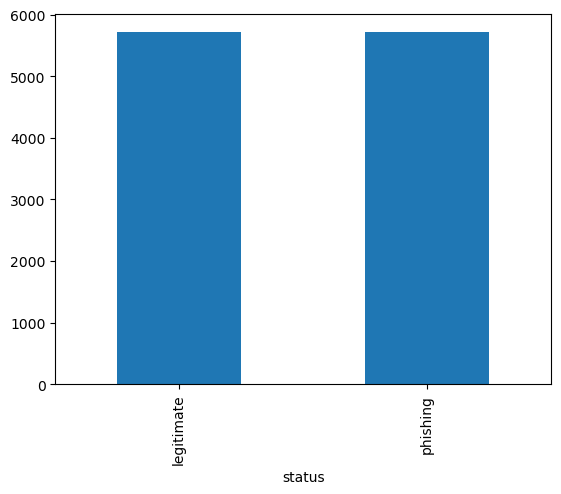

In [130]:
df.status.value_counts().sort_values().plot(kind="bar")

In [131]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [133]:
null_columns = []
for column in df.columns:
    column_na_count = df[column].isna().sum()
    if column_na_count != 0:
        null_columns.append(column)

if len(null_columns) == 0:
    print("Boş değer yok")
else:
    for column in null_columns:
        column_na_count = df[column].isna().sum()
        print(f"{column} sütununda {column_na_count} adet boş değer var.")

Boş değer yok


In [134]:
classes={'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(classes)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [136]:
df = df.apply(pd.to_numeric, errors='coerce', axis=1)


In [137]:
correlations = df.corr()['status']

column_to_drop = correlations[correlations.isna()].index

df = df.drop(columns=column_to_drop, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  float64
 1   length_hostname             11430 non-null  float64
 2   ip                          11430 non-null  float64
 3   nb_dots                     11430 non-null  float64
 4   nb_hyphens                  11430 non-null  float64
 5   nb_at                       11430 non-null  float64
 6   nb_qm                       11430 non-null  float64
 7   nb_and                      11430 non-null  float64
 8   nb_eq                       11430 non-null  float64
 9   nb_underscore               11430 non-null  float64
 10  nb_tilde                    11430 non-null  float64
 11  nb_percent                  11430 non-null  float64
 12  nb_slash                    11430 non-null  float64
 13  nb_star                     114

In [138]:
for column, correlation in correlations.items():
    print(f"{column}: {correlation}")

url: nan
length_url: 0.24858046741991785
length_hostname: 0.23832240376368571
ip: 0.3216977823874091
nb_dots: 0.20702877302594608
nb_hyphens: -0.10010749922687573
nb_at: 0.1429145682495236
nb_qm: 0.2943190708457299
nb_and: 0.17054637539522324
nb_or: nan
nb_eq: 0.23338630384578937
nb_underscore: 0.038091335717948885
nb_tilde: 0.030142327921163874
nb_percent: 0.0281012907323974
nb_slash: 0.2422699601753399
nb_star: 0.026465122927556164
nb_colon: 0.09283530688602196
nb_comma: 0.011864645370159898
nb_semicolumn: 0.10355407191497115
nb_dollar: 0.02496205711274488
nb_space: -0.004193221721663016
nb_www: -0.4434676875128603
nb_com: 0.15628353122693384
nb_dslash: 0.07260233721343713
http_in_path: 0.07077623749635599
https_token: 0.11466906528633683
ratio_digits_url: 0.3563945701626024
ratio_digits_host: 0.22433492719580636
punycode: 0.018710391971381544
port: 0.009011115578823205
tld_in_path: 0.0791465083738078
tld_in_subdomain: 0.20888415296656912
abnormal_subdomain: 0.12815984230478297
nb_su

<Axes: >

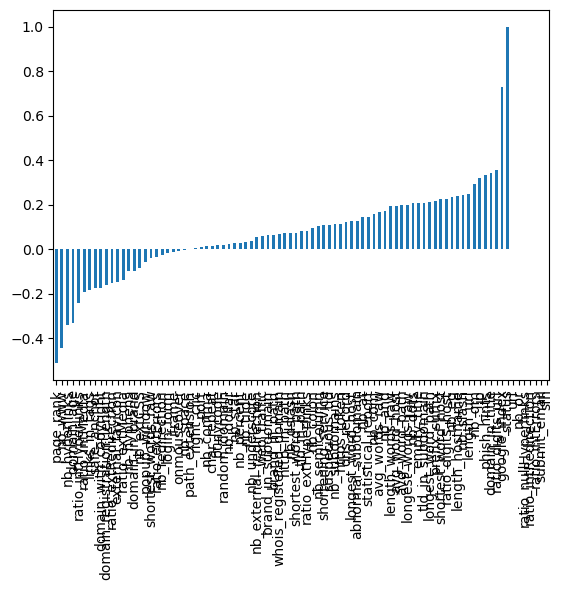

In [139]:
correlations.sort_values().plot(kind="bar")

In [140]:
df = df.fillna(0)

In [141]:
X = df.drop(['status'], axis = 1).values
y = df['status'].values

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10, test_size=0.20)


In [143]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
logred_pred = LR_model.predict(X_test)

c:\Users\Monster\anaconda3\envs\yapayzeka\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
from 
catboost_model = Cat

SyntaxError: invalid syntax (1677946817.py, line 1)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name}: Model:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: (Weighted): {accuracy}")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

In [ ]:
evaluate_model(y_test, logred_pred, "LogisticRegression")
evaluate_model(y_test, svm_pred, "Support Vector Mahine")

LogisticRegression: Model:
Accuracy: 0.7808398950131233
F1 Score: (Weighted): 0.7808398950131233
[[915 237]
 [264 870]]


Support Vector Mahine: Model:
Accuracy: 0.5971128608923885
F1 Score: (Weighted): 0.5971128608923885
[[ 352  800]
 [ 121 1013]]


